In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack
from matplotlib import pyplot as plt

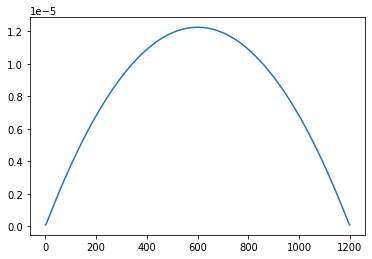

In [35]:
amplitude = 10000
sim_width = 120e-6
pixel_size = 0.1e-6 
n_slices = 1000

lens = Lens.Lens(
    diameter=sim_width,
    height=12.248e-6,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens.generate_profile(pixel_size=pixel_size)

centre_px = (len(lens.profile)-1)//2

plt.plot(lens.profile)
plt.show()

In [36]:
medium = Lens.Medium(1.33)

equivalent_radius_of_curvature = 0.5 * (lens.height + (lens.diameter / 2) ** 2 / lens.height)
equivalent_focal_distance = (equivalent_radius_of_curvature * medium.refractive_index) / (lens.medium.refractive_index - medium.refractive_index)

print(f'Lens diameter: {lens.diameter}')

print(f'focal distance: {equivalent_focal_distance*1e3}')
f=200e-6
print(f'f: {f*1e3}')

a = 1
b = -2*f*(lens.medium.refractive_index-medium.refractive_index)/medium.refractive_index
c = (lens.diameter/2)**2

# print(f'a: {a}')
# print(f'b: {b}')
# print(f'c: {c}')

# h1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
h2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
# print(h1)
print(f'Height to get focal distance of: {f*1e3}mm is: {round(h2*1e6, 3)}micron)')


Lens diameter: 0.00012
focal distance: 0.20000530780375197
f: 0.2
Height to get focal distance of: 0.2mm is: 12.248micron)


In [7]:
lens_h1 = Lens.Lens(
    diameter=sim_width,
    height=h1,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens_h1.generate_profile(pixel_size=pixel_size)

print(Simulation.calculate_equivalent_focal_distance(lens_h1, medium))


nan


In [23]:
lens_h2 = Lens.Lens(
    diameter=sim_width,
    height=h2,
    exponent=2.,
    medium=Lens.Medium(2.348)
)
lens_h2.generate_profile(pixel_size=pixel_size)

print(Simulation.calculate_equivalent_focal_distance(lens_h2, medium))


-0.060000002090327346
